# Seattle Airbnb Analysis
In this notebook we are using the seatlle airbnb dataset from Kaggle ([link](https://www.kaggle.com/datasets/airbnb/seattle)) to better understand how the earning and pricing of different housing listing differs across various region and timeframe of the year.

In [51]:
# load necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [52]:
# load seatlle airbnb data from Kaggle

listings_df = pd.read_csv('./data/seattle/listings.csv')
reviews_df = pd.read_csv('./data/seattle/reviews.csv')
calendar_df = pd.read_csv('./data/seattle/calendar.csv')


# Exploratory Data Analysis

## Types of property & general discoveries
_Questions: What types of property are listed? How do the price for different property types differ? What other findings regarding he property types?_  
<br>
      - the most common obsreved property type in this dataset are Houses and Apartments. Together these two types of property are around 90% of all the listings in the dataset.  
      <br>
      - Boats has highest listed price in the dataset with $285 per night. However, there are only 8 listings are categorized as "Boat" property type. So it might potetntially possess data bias due to its small sample size. But another possibility is due to its limited supply, the market price of it becomes much higher than the others.  
      <br>
      - 'Dorm' and 'Tent' have lowest price listed at average $35 to $55 range.   
In this section I will explore the dimensions of datasets and missingness ratio. Understand the timeframe and rented price a bit more.

Based on EDA, we will mostly leverage the listings dataset to understand how the different listing features intereact with its review scores and listed pricing.

* listings_df contains the details of each listings including its region, neighborhood, review score, property feature, renting rule, listed price, etc..


In [53]:
print(listings_df.shape)
print(listings_df.columns)
display(listings_df.head(5))


(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

* reviews dataset contains textual comment from customers along with comment date and corresponding listing id

In [54]:
print(reviews_df.shape)
print(reviews_df.columns)
reviews_df.head(5)

(84849, 6)
Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


*  calendar_df listed the actual renting history with actual price paid 
(can be join to listings data frame through listing_id)

In [55]:
print(calendar_df.shape)
calendar_df.head(5)

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


count    3171.000000
mean       94.539262
std         6.606083
min        20.000000
25%        93.000000
50%        96.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64


Text(0.5, 1.0, 'Review Score Histogram')

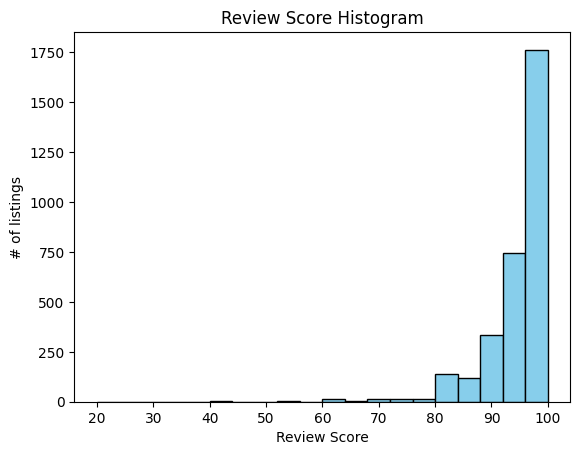

In [56]:
# explore the distribution of the listing reviews

print(listings_df['review_scores_rating'].describe())

plt.hist(listings_df['review_scores_rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Review Score')
plt.ylabel('# of listings')
plt.title('Review Score Histogram')

In [57]:
# explore the relationship between selected variables
var_list= [
    'price', 
    'monthly_price',
    'weekly_price',
    'property_type',
    'neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'city',
    'state',
    'room_type',
    'square_feet', 
    'beds',
    'cancellation_policy',
    'review_scores_rating', 
    'review_scores_location',
    'review_scores_value',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'bedrooms',
    'host_is_superhost']
new_df = listings_df[var_list]

# convert cancellation column to numerical based on how strict the policy is
set(new_df['cancellation_policy'])
cancellation_d = {'flexible': 0,
    'moderate':1,
    'strict':2}
new_df['cancellation_policy_num'] = new_df['cancellation_policy'].map(cancellation_d)

# convert price columns to numerical
new_df['price_clean'] = pd.to_numeric(new_df['price'].str.replace('$',''), errors='coerce')

/tmp/ipykernel_1104/397159308.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cancellation_policy_num'] = new_df['cancellation_policy'].map(cancellation_d)
/tmp/ipykernel_1104/397159308.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price_clean'] = pd.to_numeric(new_df['price'].str.replace('$',''), errors='coerce')


#### __Houses and Apartments are the most commonly listed property type in Seattle with average priced at $120~130 per night__

Q: What's the property type that has highest price listed?  
A: 'Boat' follow by 'Condominium' but there are only small amount listing for this type.

Q: What's the property type that has lowest price listed?  
A: 'Dorm' and 'Tent'

Q: What's the most common property type listed?  
A: Houses and Apartments

,price_clean,square_feet,beds,review_scores_rating,bedrooms,cancellation_policy_num,listing_volume,listing_volume_pct
property_type,,,,,,,,
Boat,282.375000,300.000000,2.250000,95.600000,1.750000,0.625000,8,0.2%
Condominium,151.109890,800.000000,1.692308,95.318841,1.241758,1.087912,91,2.4%
Loft,135.700000,NaN,1.650000,95.454545,0.750000,1.150000,40,1.0%
House,131.850462,1039.918367,1.948585,94.830021,1.608897,1.053695,1732,45.4%
Townhouse,129.457627,2100.000000,1.813559,96.625000,1.508475,0.966102,118,3.1%
Apartment,122.932670,681.750000,1.528689,93.977591,1.033451,1.103630,1708,44.7%
Camper/RV,120.461538,NaN,1.692308,95.700000,0.692308,1.153846,13,0.3%
Bungalow,115.615385,NaN,1.538462,97.666667,0.615385,0.692308,13,0.3%
Bed & Breakfast,112.054054,2.000000,1.351351,95.730769,1.000000,0.810811,37,1.0%


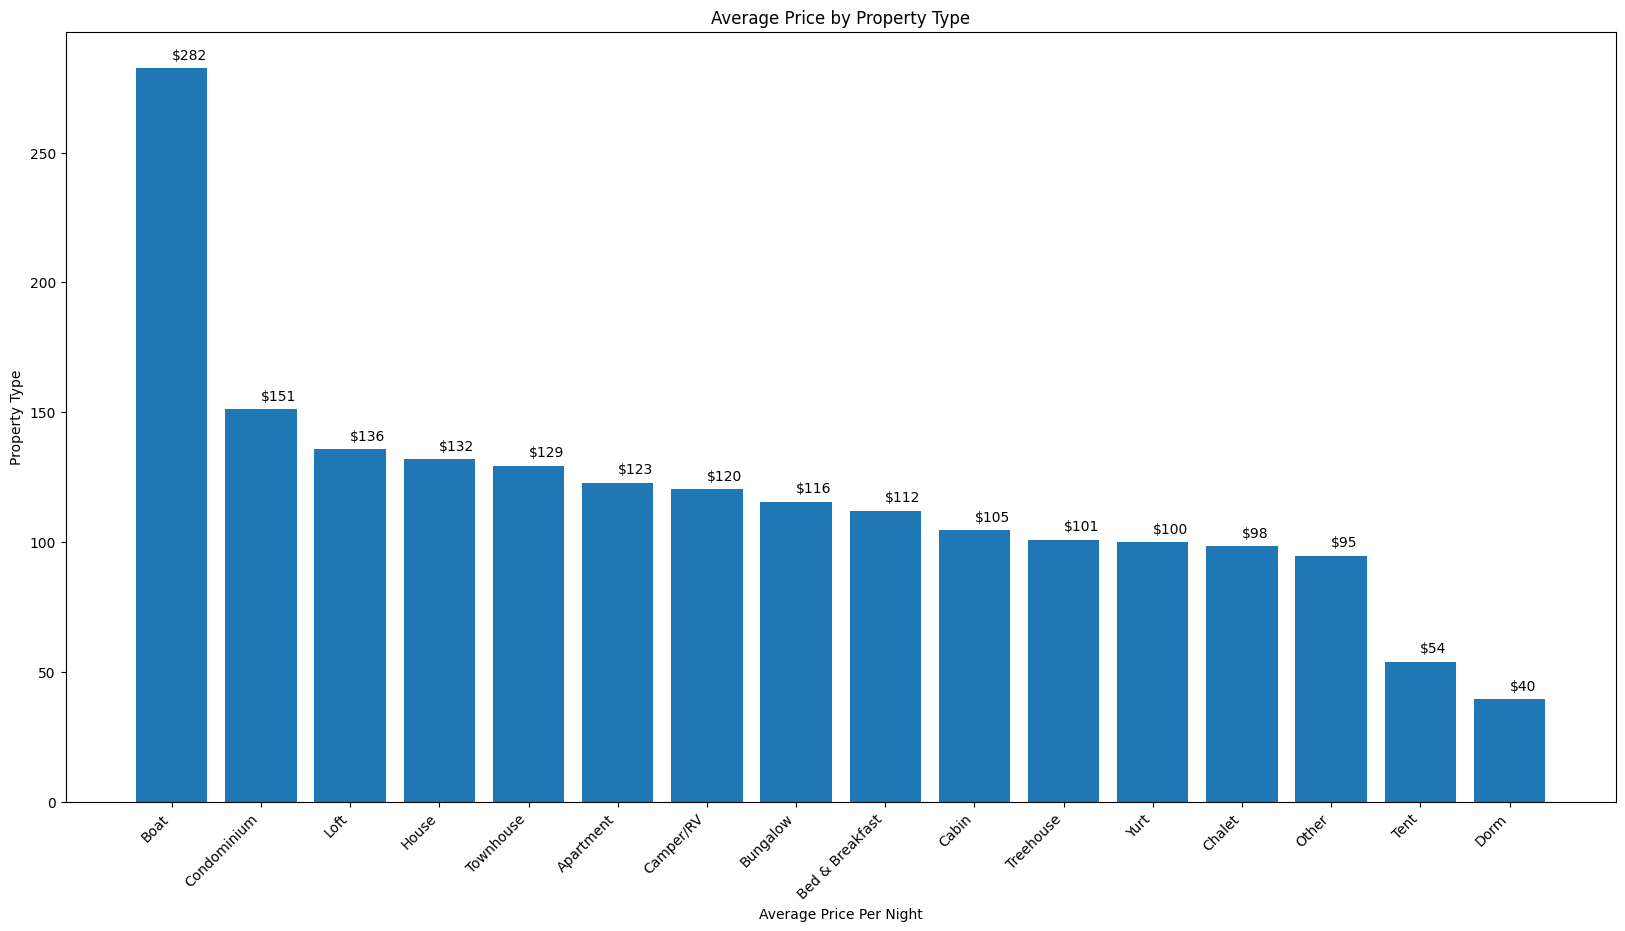

In [105]:

df_price_clean = new_df.dropna(subset=('price_clean'))
df_summary = df_price_clean.groupby(['property_type']).agg({
    'price_clean':'mean',
    'square_feet':'mean',
    'beds':'mean',
    'review_scores_rating':'mean',
    'bedrooms':'mean',
    'cancellation_policy_num':'mean',
    'review_scores_rating':'mean',
    'property_type':'size'
}).sort_values(['price_clean'], ascending=False)
df_summary.rename(columns={'property_type': 'listing_volume'}, inplace=True)
df_summary['listing_volume_pct']=df_summary['listing_volume']/df_price_clean.shape[0]
df_summary['listing_volume_pct']=df_summary['listing_volume_pct'].apply(lambda x: f'{x:.1%}')
display(df_summary)

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
# adding bar plot showing price by property types
plt.bar(df_summary.index, df_summary['price_clean'])
# addint labels and titles
plt.xlabel('Average Price Per Night')
plt.ylabel('Property Type')
plt.title('Average Price by Property Type')
plt.xticks(rotation=45, ha='right')

# add price value on top of each bar
for i, price in enumerate(df_summary['price_clean']):
     plt.text(i, price + 5 , '${:.0f}'.format(price), va='center')

# display the plot
plt.show()

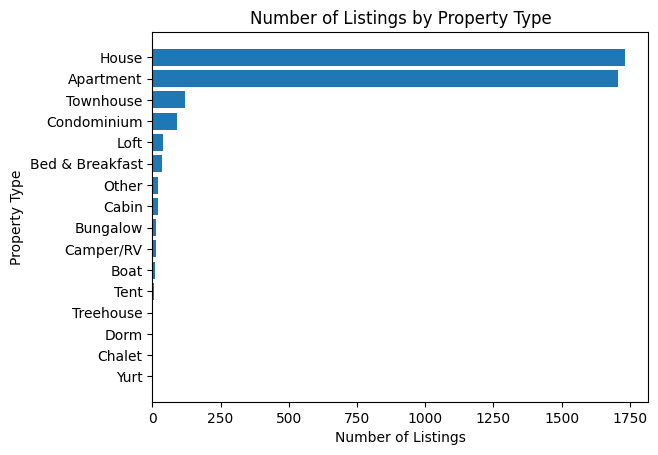

In [93]:
# plot the number of listing by property type
df_summary_sorted = df_summary.sort_values('listing_volume', ascending=True)
plt.barh(df_summary_sorted.index, df_summary_sorted['listing_volume'])
# addint labels and titles
plt.xlabel('Number of Listings')
plt.ylabel('Property Type')
plt.title('Number of Listings by Property Type')
# display the plot
plt.show()

In [59]:
# aggregate price and availability by listing_id in calendar data frame
mapping_tf={'t':1,'f':0}
calendar_df['available_dummy']=calendar_df['available'].replace(mapping_tf) 
calendar_df['price_clean'] = pd.to_numeric(calendar_df['price'].str.replace('$',''),errors='coerce')

calendar_agg = calendar_df.groupby('listing_id').agg({
    'available_dummy':[('days_available','sum')],
    'price_clean':[('price_mean','mean')],
})

## What time of year there are most listings available on Airbnb, what's the average price listed?

- Based on chart generated in the following, we are able to see the March and holiday season (from October to December) has most listings available on the webstie

- Price wise, the summer listing averaged highest at around $150 per night. The begning of the year from January to March, the price is the lowest with $120~130 per night.

In [68]:
calendar_df['date']=pd.to_datetime(calendar_df['date'])
calendar_df['year']=calendar_df['date'].dt.year
calendar_df['month']=calendar_df['date'].dt.month
summary_avg_by_month = calendar_df.groupby(['year','month']).agg({
    'available_dummy':[('total_listings','sum')],
    'price_clean':[('average_price','mean')],
    'date': [('starting_date','min'),
    ('date_unique','nunique')]
}).reset_index()
#summary_avg_by_month['listings_per_day'] = summary_avg_by_month['total_listings']/summary_avg_by_month['date_unique']
print(summary_avg_by_month.columns)
avg_availability = summary_avg_by_month['available_dummy'].mean()
summary_avg_by_month['fluctuation_pct']=(summary_avg_by_month['available_dummy']-avg_availability)/avg_availability

# Dropping 2017 January since only 2 days available
drop_index=(summary_avg_by_month['month']==1) & (summary_avg_by_month['year']==2017)
summary_avg_by_month = summary_avg_by_month[~drop_index]
summary_avg_by_month

MultiIndex([(           'year',               ''),
            (          'month',               ''),
            ('available_dummy', 'total_listings'),
            (    'price_clean',  'average_price'),
            (           'date',  'starting_date'),
            (           'date',    'date_unique')],
           )


year month available_dummy   price_clean          date              \
                total_listings average_price starting_date date_unique   
0   2016     1           59239    121.256898    2016-01-04          28   
1   2016     2           73321    123.947429    2016-02-01          29   
2   2016     3           83938    127.963804    2016-03-01          31   
3   2016     4           76037    134.400282    2016-04-01          30   
4   2016     5           79971    138.832159    2016-05-01          31   
5   2016     6           77244    146.771935    2016-06-01          30   
6   2016     7           74222    151.286857    2016-07-01          31   
7   2016     8           76347    149.712349    2016-08-01          31   
8   2016     9           77246    142.285931    2016-09-01          30   
9   2016    10           82438    136.140247    2016-10-01          31   
10  2016    11           81780    134.815529    2016-11-01          30   
11  2016    12           87061    136.306108    2016-12-01          31   

   fluctuation_pct  
                    
0        -0.175952  
1         0.019936  
2         0.167624  
3         0.057717  
4         0.112441  
5         0.074507  
6         0.032469  
7         0.062029  
8         0.074535  
9         0.146759  
10        0.137605  
11        0.211067

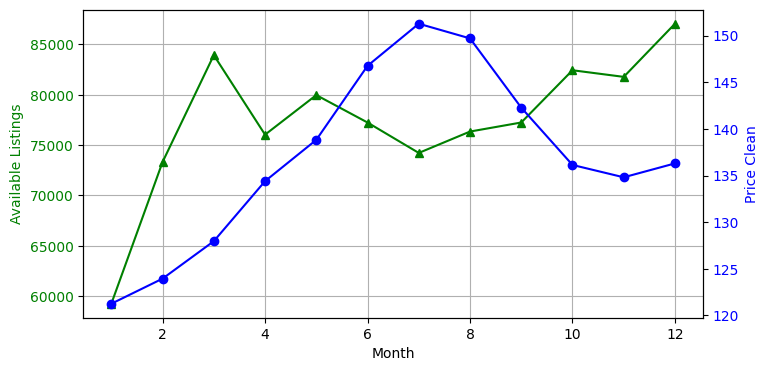

In [61]:
# Plotting the line chart with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plotting available_dummy on the first y-axis
ax1.plot(summary_avg_by_month['month'], summary_avg_by_month['available_dummy'], color='g', marker='^')
ax1.set_xlabel('Month')
ax1.set_ylabel('Available Listings', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax1.grid(True)

# Creating a second y-axis
ax2 = ax1.twinx()

# Plotting price_clean on the second y-axis
ax2.plot(summary_avg_by_month['month'], summary_avg_by_month['price_clean'], color='b', marker='o')
ax2.set_ylabel('Price Clean', color='b')
ax2.tick_params(axis='y', labelcolor='b')

- Based on above chart, we are able to see the March and holiday season (from October to December) has most listings available on the webstie

- Price wise, the summer listing averaged highest at around $150 per night. The begning of the year from January to March, the price is the lowest with $120~130 per night.

## **Neighborhood To Visit**

In this part of analysis, we are going to group the dataset by neighborhood areas and property types since it is only fair to compare price across same type of property. I am also interested in knowiong whether the different price of property type can be caused by regional differences.

Q: Where are most listings located in this data set?  

- Among 195 neighborhood group + neighborhood subgroup area, "Capitol Hill - Broadway" have the highest number of listings 336, followed by "Belltown - Downtown" at 203 and "Fremont" at 140.  
</br>

Q: Which neighborhood to choose when visiting seattle?  
- For people interested in renting apartments, "West Seatlle" rated highest on review for location and has a fairly good averaged price per night at $98.
- For perople intersted in renting houses, if budget is high, Queen Ann area is worth considering since it has been rated highest location review scrores. However Queen Anne region also has highest averaged price at $223. Following Queen Anne, Capitol Hill, Ballard, and West Seattle areas also have high review scroe above 9.7. Among these three areas, Ballard averaged lowest at $137.  
</br>  

Q: Which neighborhood is pricey which are not? 
- "Quinn Ann" priced highest for both apartments and houses and "Magnolia" priced highest overall regardless type of property at $178
- "Delridge" priced lowest among all area regardless property types at $83 per night


In [62]:
# this segment I will aggregate metrics of listings by groups. Hence adjust setting to show the complete summary table 
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [63]:
# explore how many neightborhood area existing in the data set and how many listings in each neighbourhood areas
 
print(len(df_price_clean['neighbourhood'].unique()))
print(len(df_price_clean['neighbourhood_cleansed'].unique()))
print(len(df_price_clean['neighbourhood_group_cleansed'].unique()))
print(df_price_clean.groupby(['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']).size().reset_index(name='count').shape[0])
df_price_clean.groupby(['neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed']).size().reset_index(name='count').sort_values(['count'],ascending=False).head(10)

82
87
17
196


,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,count
27,Capitol Hill,Broadway,Capitol Hill,336
15,Belltown,Belltown,Downtown,203
57,Fremont,Fremont,Other neighborhoods,140
186,Wallingford,Wallingford,Other neighborhoods,139
117,Minor,Minor,Central Area,119
181,University District,University District,University District,104
172,Stevens,Stevens,Capitol Hill,96
54,First Hill,First Hill,Downtown,89
99,Lower Queen Anne,Lower Queen Anne,Queen Anne,76
68,Greenwood,Greenwood,Other neighborhoods,75


There are 6 areas that have averaged total review score higher than 95 points. Ordered by the review scores from highest to lowest, there districts are "Central Area", "West Seattle", "Delridge", "Ballard" and "Queen Anne" and "Seward Park". Among these 6 area, "Delridge" priced lowest at $83 per night and "Queen Anne" priced highest at $157 per night.

In [64]:
## group by dataset by neighborhood and property type

display(df_price_clean.groupby(['neighbourhood_group_cleansed']).agg({
    'price_clean': 'mean',
    'property_type':'size',
    'review_scores_rating':'mean',
    'review_scores_location':'mean',
    'review_scores_value':'mean',
    }
    ).sort_values(['price_clean'], ascending= False))



,price_clean,property_type,review_scores_rating,review_scores_location,review_scores_value
neighbourhood_group_cleansed,,,,,
Magnolia,177.672131,61,93.787234,9.617021,9.404255
Queen Anne,157.223729,295,95.443089,9.751020,9.591837
Downtown,154.405660,530,93.958333,9.769737,9.274123
West Seattle,141.359606,203,95.864198,9.765432,9.641975
Cascade,140.101124,89,92.461538,9.569231,9.215385
Capitol Hill,130.592593,567,94.184783,9.823529,9.348584
Central Area,128.338753,369,96.009404,9.489028,9.572327
Ballard,124.682609,230,95.533679,9.766839,9.569948
Other neighborhoods,118.858764,793,94.554198,9.640000,9.492308


### Houses:
To rent houses, Queen Ann area has been rated highest location review scrores however it is also the most expensive place to rent with price per night at $223. Following Queen Anne, Capitol Hill, Ballard, and West Seattle areas also have high review scroe above 9.7. Among these three areas, Ballard averaged lowest at $137.  

If budget is limited, Delridge area has lowest averaged price at $82. And there are also several areas averaged priced at $90~100 per night price range. Among those areas, Northgate and University District also has a good location review scores above 9.4.

In [65]:
## explore for the most popular property types House and Apartment (also highest listing volume in the dataset)
## what's best area to rent Apartment and House respectively
display(df_price_clean.loc[df_price_clean['property_type']=="House"].groupby(['property_type','neighbourhood_group_cleansed']).agg({
    'price_clean': 'mean',
    'property_type':'size',
    'review_scores_rating':'mean',
    'review_scores_location':'mean',
    'review_scores_value':'mean',
}).sort_values(['price_clean'], ascending= False))

df_price_clean.loc[df_price_clean['property_type']=="House"].groupby(['property_type','neighbourhood_group_cleansed']).agg({
    'price_clean': 'mean',
    'property_type':'size',
    'review_scores_rating':'mean',
    'review_scores_location':'mean',
    'review_scores_value':'mean',
}).sort_values(['review_scores_location'], ascending= False)


price_clean  property_type  \
property_type neighbourhood_group_cleansed                               
House         Queen Anne                     222.935484             93   
              Magnolia                       185.897436             39   
              Downtown                       174.500000              2   
              Cascade                        169.222222              9   
              West Seattle                   152.042553            141   
              Capitol Hill                   149.601190            168   
              Central Area                   139.893519            216   
              Ballard                        136.589041            146   
              Other neighborhoods            125.535354            495   
              Seward Park                    114.257143             35   
              University District             97.307692             39   
              Lake City                       94.166667             54   
              Beacon Hill                     93.368421             76   
              Rainier Valley                  92.605263            114   
              Northgate                       92.155556             45   
              Interbay                        92.000000              4   
              Delridge                        82.017857             56   

                                            review_scores_rating  \
property_type neighbourhood_group_cleansed                         
House         Queen Anne                               95.867470   
              Magnolia                                 94.935484   
              Downtown                                100.000000   
              Cascade                                  88.285714   
              West Seattle                             96.008696   
              Capitol Hill                             94.541353   
              Central Area                             96.083770   
              Ballard                                  95.328000   
              Other neighborhoods                      94.185366   
              Seward Park                              94.906250   
              University District                      92.750000   
              Lake City                                93.543478   
              Beacon Hill                              93.647059   
              Rainier Valley                           94.666667   
              Northgate                                95.000000   
              Interbay                                 95.500000   
              Delridge                                 95.291667   

                                            review_scores_location  \
property_type neighbourhood_group_cleansed                           
House         Queen Anne                                  9.795181   
              Magnolia                                    9.580645   
              Downtown                                    9.500000   
              Cascade                                     9.428571   
              West Seattle                                9.721739   
              Capitol Hill                                9.789474   
              Central Area                                9.471204   
              Ballard                                     9.760000   
              Other neighborhoods                         9.633907   
              Seward Park                                 9.250000   
              University District                         9.516129   
              Lake City                                   9.239130   
              Beacon Hill                                 8.970588   
              Rainier Valley                              8.989583   
              Northgate                                   9.444444   
              Interbay                                    9.000000   
              Delridge                                    9.166667   

             

price_clean  property_type  \
property_type neighbourhood_group_cleansed                               
House         Queen Anne                     222.935484             93   
              Capitol Hill                   149.601190            168   
              Ballard                        136.589041            146   
              West Seattle                   152.042553            141   
              Other neighborhoods            125.535354            495   
              Magnolia                       185.897436             39   
              University District             97.307692             39   
              Downtown                       174.500000              2   
              Central Area                   139.893519            216   
              Northgate                       92.155556             45   
              Cascade                        169.222222              9   
              Seward Park                    114.257143             35   
              Lake City                       94.166667             54   
              Delridge                        82.017857             56   
              Interbay                        92.000000              4   
              Rainier Valley                  92.605263            114   
              Beacon Hill                     93.368421             76   

                                            review_scores_rating  \
property_type neighbourhood_group_cleansed                         
House         Queen Anne                               95.867470   
              Capitol Hill                             94.541353   
              Ballard                                  95.328000   
              West Seattle                             96.008696   
              Other neighborhoods                      94.185366   
              Magnolia                                 94.935484   
              University District                      92.750000   
              Downtown                                100.000000   
              Central Area                             96.083770   
              Northgate                                95.000000   
              Cascade                                  88.285714   
              Seward Park                              94.906250   
              Lake City                                93.543478   
              Delridge                                 95.291667   
              Interbay                                 95.500000   
              Rainier Valley                           94.666667   
              Beacon Hill                              93.647059   

                                            review_scores_location  \
property_type neighbourhood_group_cleansed                           
House         Queen Anne                                  9.795181   
              Capitol Hill                                9.789474   
              Ballard                                     9.760000   
              West Seattle                                9.721739   
              Other neighborhoods                         9.633907   
              Magnolia                                    9.580645   
              University District                         9.516129   
              Downtown                                    9.500000   
              Central Area                                9.471204   
              Northgate                                   9.444444   
              Cascade                                     9.428571   
              Seward Park                                 9.250000   
              Lake City                                   9.239130   
              Delridge                                    9.166667   
              Interbay                                    9.000000   
              Rainier Valley                              8.989583   
              Beacon Hill                                 8.970588   

             

### Apartments 
For apartments, most apartments listing are in Downtown and Capitol Hill areas. Downtown aparments priced highest among all area at $153 per night. Among all the area groups, "West Seattle" area rated highest on the location review score (9.79) with averaged listed price per night below $100. If with limited budget but would like to get a good location place, "West Seattle" definitely can be one of the top areas to be considered.

In [66]:
display(df_price_clean.loc[df_price_clean['property_type']=="Apartment"].groupby(['property_type','neighbourhood_group_cleansed']).agg({
    'price_clean': 'mean',
    'property_type':'size',
    'review_scores_rating':'mean',
    'review_scores_location':'mean',
    'review_scores_value':'mean',
}).sort_values(['review_scores_location'], ascending= False))

display(df_price_clean.loc[df_price_clean['property_type']=="Apartment"].groupby(['property_type','neighbourhood_group_cleansed']).agg({
    'price_clean': 'mean',
    'property_type':'size',
    'review_scores_rating':'mean',
    'review_scores_location':'mean',
    'review_scores_value':'mean',
}).sort_values(['price_clean'], ascending= False))

price_clean  property_type  \
property_type neighbourhood_group_cleansed                               
Apartment     West Seattle                    98.095238             42   
              Capitol Hill                   119.176966            356   
              Ballard                        108.066667             60   
              Downtown                       153.989339            469   
              Queen Anne                     123.497041            169   
              Other neighborhoods            107.212766            235   
              Interbay                       131.250000              4   
              Magnolia                       151.833333             12   
              Cascade                        123.808824             68   
              Central Area                   103.235294            102   
              Seward Park                     86.000000              9   
              Lake City                       87.636364             11   
              Beacon Hill                     84.608696             23   
              Northgate                       86.629630             27   
              Delridge                        98.333333             15   
              Rainier Valley                  93.133333             30   
              University District             92.934211             76   

                                            review_scores_rating  \
property_type neighbourhood_group_cleansed                         
Apartment     West Seattle                             96.272727   
              Capitol Hill                             93.841751   
              Ballard                                  95.865385   
              Downtown                                 93.848259   
              Queen Anne                               94.843972   
              Other neighborhoods                      95.025907   
              Interbay                                 92.333333   
              Magnolia                                 90.727273   
              Cascade                                  92.557692   
              Central Area                             95.465909   
              Seward Park                              95.571429   
              Lake City                                97.750000   
              Beacon Hill                              93.000000   
              Northgate                                94.375000   
              Delridge                                 97.363636   
              Rainier Valley                           94.120000   
              University District                      85.750000   

                                            review_scores_location  \
property_type neighbourhood_group_cleansed                           
Apartment     West Seattle                                9.939394   
              Capitol Hill                                9.827703   
              Ballard                                     9.769231   
              Downtown                                    9.768657   
              Queen Anne                                  9.737589   
              Other neighborhoods                         9.701571   
              Interbay                                    9.666667   
              Magnolia                                    9.636364   
              Cascade                                     9.576923   
              Central Area                                9.500000   
              Seward Park                                 9.428571   
              Lake City                                   9.375000   
              Beacon Hill                                 9.333333   
              Northgate                                   9.250000   
              Delridge                                    9.181818   
              Rainier Valley                              9.120000   
              University District                         9.066667   

             

price_clean  property_type  \
property_type neighbourhood_group_cleansed                               
Apartment     Downtown                       153.989339            469   
              Magnolia                       151.833333             12   
              Interbay                       131.250000              4   
              Cascade                        123.808824             68   
              Queen Anne                     123.497041            169   
              Capitol Hill                   119.176966            356   
              Ballard                        108.066667             60   
              Other neighborhoods            107.212766            235   
              Central Area                   103.235294            102   
              Delridge                        98.333333             15   
              West Seattle                    98.095238             42   
              Rainier Valley                  93.133333             30   
              University District             92.934211             76   
              Lake City                       87.636364             11   
              Northgate                       86.629630             27   
              Seward Park                     86.000000              9   
              Beacon Hill                     84.608696             23   

                                            review_scores_rating  \
property_type neighbourhood_group_cleansed                         
Apartment     Downtown                                 93.848259   
              Magnolia                                 90.727273   
              Interbay                                 92.333333   
              Cascade                                  92.557692   
              Queen Anne                               94.843972   
              Capitol Hill                             93.841751   
              Ballard                                  95.865385   
              Other neighborhoods                      95.025907   
              Central Area                             95.465909   
              Delridge                                 97.363636   
              West Seattle                             96.272727   
              Rainier Valley                           94.120000   
              University District                      85.750000   
              Lake City                                97.750000   
              Northgate                                94.375000   
              Seward Park                              95.571429   
              Beacon Hill                              93.000000   

                                            review_scores_location  \
property_type neighbourhood_group_cleansed                           
Apartment     Downtown                                    9.768657   
              Magnolia                                    9.636364   
              Interbay                                    9.666667   
              Cascade                                     9.576923   
              Queen Anne                                  9.737589   
              Capitol Hill                                9.827703   
              Ballard                                     9.769231   
              Other neighborhoods                         9.701571   
              Central Area                                9.500000   
              Delridge                                    9.181818   
              West Seattle                                9.939394   
              Rainier Valley                              9.120000   
              University District                         9.066667   
              Lake City                                   9.375000   
              Northgate                                   9.250000   
              Seward Park                                 9.428571   
              Beacon Hill                                 9.333333   

             

In [67]:
pd.reset_option("display.max_rows")